# Lab 3 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

<center><span style="font-size:50px;">Iris Species EDA 📊</span></center>
<div style="width:100%;text-align: center;"> <img align = middle src="https://camo.githubusercontent.com/42abe3d5f8402b9352e13fce37e00d575ccb9f220d10fd31e0318b3c598f352a/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f353135313869726973253230696d67312e706e67" style="height:800;"> </div>

# Table of Contents

1. [Data Understanding](#1.-Data-Understanding)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    - 2.1 [Analyze categorical variables](#2.1.-Analyze-categorical-variables)
    - 2.2 [Univariate Analysis](#2.2.-Univariate-Analysis)
    - 2.3 [Bivariate Analysis](#2.3.-Bivariate-Analysis)
    - 2.4 [Correlations Analysis](#2.4.-Correlations-Analysis)
    - 2.5 [Multivariate Analysis](#2.5.-Multivariate-Analysis)
    - 2.6 [3D Visualization](#2.6.-3D-Visualization)
4. [Insights](#3.-Insights)
5. [References](#4.-References)

# About the Dataset
**Iris Dataset** is a classic dataset used in pattern recognition, machine learning, and data visualization. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is small but does not lack in illustrating the challenges in clustering or classifying flowers based on the measurements of their characteristics.

The dataset contains `150` observations of iris flowers from three different species `Iris Setosa`, `Iris Versicolor`, and `Iris Virginica`. There are `50` observations from each species.

The attributes in the dataset, including sepal length, sepal width, petal length, and petal width, are important features of flowers in the iris dataset. They are commonly used in machine learning and statistical analysis to classify and identify different species of iris flowers based on their measurements. These measurements help in understanding the physical characteristics of the flowers and can be utilized for various applications in botany, ecology, and data analysis.

# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding

### Reading the dataset

In [2]:
df = pd.read_csv('../data/Iris.csv')

### Shape of data

In [3]:
num_rows, num_columns = df.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Iris Flower Data:
Number of Rows: 150
Number of Columns: 6



### Examine some first rows

In [4]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### Meaning of each column

| # | Name | Description |
| --- | --- | --- |
| 1 | `Id` | Unique number for each row |
| 2 | `SepalLengthCm` | Length of the sepal (cm) |
| 3 | `SepalWidthCm` | Width of the sepal (cm) |
| 4 | `PetalLengthCm` | Length of the petal (cm) |
| 5 | `PetalWidthCm` | Width of the petal (cm) |
| 6 | `Species` | Name of the species |

Typically, the `Id` column is just a column containing a sequential or unique number encoding each sample. It does not contain any meaningful or useful information regarding the characteristics of the Iris flower. Since it starts from 1, we will use the traditional index instead, by eliminating the `Id` column, we simplify data processing and analysis, making code or statistical operations on the data easier and clearer. 

So let's drop it.

In [5]:
# Drooping Id 
df.drop(columns=['Id'], inplace=True)

Also, we noticed that all numerical variables share the same unit measure (Cm), so let's just remove the 'Cm' label from the names to read them easier.

In [6]:
df.columns = df.columns.str.replace('Cm', '')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

### Take a look at the summary of our dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations:**
- All columns have 150 non-null entries, indicating that there are no missing values in the dataset.
- The dataset contains four numerical features (`float64`): Sepal Length, Sepal Width, Petal Length, and Petal Width. These features have continuous values and are measured in centimeters (cm).
The target variable is categorical and represents the species of iris flowers (`object`).

### Looking at the statistics of our dataset

In [8]:
df.describe()

SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

**Comment:**
1. `Sepal Length`:
    - The average sepal length across all samples is approximately 5.84 cm, with a standard deviation of 0.83 cm. This means that most sepals are around this length, but there can be a variation of about 0.83 cm.
    - The shortest sepal is 4.3 cm, and the longest is 7.9 cm.
    - The 25%, 50% (median), and 75% percentiles indicate that 50% of the sepals have a length between 5.1 cm and 6.4 cm.
2. `Sepal Width`:
    - The average sepal width is about 3.05 cm, with a standard deviation of 0.43 cm.
    - The narrowest sepal is 2.0 cm, and the widest is 4.4 cm.
    - Half of the sepals have a width between 2.8 cm and 3.3 cm.
3. `Petal Length`:
    - The average petal length is approximately 3.76 cm, with a standard deviation of 1.76 cm, indicating a higher variability in petal length compared to sepal dimensions.
    - The shortest petal is 1.0 cm, and the longest is 6.9 cm.
    - Half of the petals have a length between 1.6 cm and 5.1 cm.
4. `Petal Width`:
    - The average petal width is about 1.20 cm, with a standard deviation of 0.76 cm.
    - The narrowest petal is 0.1 cm, and the widest is 2.5 cm.
    - Half of the petals have a width between 0.3 cm and 1.8 cm.

### Lets check for any missing values in the dataset

In [9]:
print("Total number of missing values")
print('-' * 30)
print(df.isna().sum())
print('-' * 30)
print("Total missing values are:", df.isna().sum().sum())
print('-' * 30)

Total number of missing values
------------------------------
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


The dataset contains no missing values, demonstrating its completeness and readiness for analysis or modeling tasks. With all columns having non-null values, there is no need for imputation or handling missing data.

### Lets check for any duplicate values in the dataset

In [10]:
# Count duplicate rows in train_data
data_duplicates = df.duplicated(keep=False).sum()

print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 5


Lets examine those duplicated rows

In [11]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
9            4.9         3.1          1.5         0.1     Iris-setosa
34           4.9         3.1          1.5         0.1     Iris-setosa
37           4.9         3.1          1.5         0.1     Iris-setosa
101          5.8         2.7          5.1         1.9  Iris-virginica
142          5.8         2.7          5.1         1.9  Iris-virginica


The amount of duplicated data is relatively small and our dataset only contains about 150 rows, so to make the `Species` distribution more balanced and convenient for analysis, we won't drop it.

Taking a look at the different types of `Species` and counting the total number of unique values so that we can look the class distribution of our dataset.

In [12]:
print("The different Species in the dataset are:", df['Species'].unique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Those are the basic data analysis steps, let's move on to deeper data analysis to find useful insights.

# 2. Exploratory Data Analysis

In [13]:
categorical_columns = df.select_dtypes('object').columns
if len(categorical_columns) == 1:
    categorical_columns = categorical_columns[0]
categorical_columns

'Species'

In [14]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

## 2.1. Analyze categorical variables

Since there's only one categorical variable in our dataset. We should analyze the distribution of the `Species` in our dataset to see if the classes are balanced.

In [15]:
data = df[categorical_columns].value_counts()
print("The distribution of the classes is:")
data

The distribution of the classes is:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

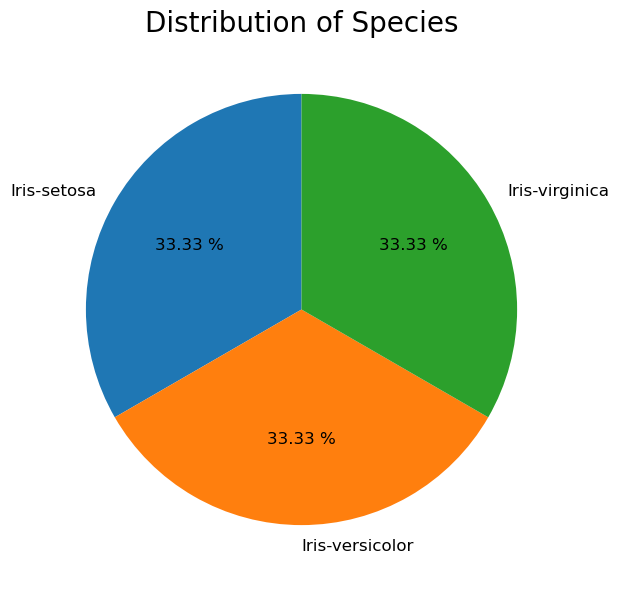

In [16]:
plt.figure(figsize = (10, 7))
plt.pie(data.values, labels=data.index, autopct = "%.2f %%", startangle = 90, textprops = {'fontsize': 12})
plt.title('Distribution of Species', fontsize = 20)
plt.show()

**Comment**:
- The `Species` classes are equally balanced. That's why we decided to hold the duplicated values since it may affect our analysis result. 

## 2.2. Univariate Analysis

Univariate analysis is the simplest form of analyzing data. We only take a single variable into consideration and try to find relations based on that. 

### Numerical Features Distribution

In [17]:
print("Numerical variables:",num_cols.tolist())

Numerical variables: ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


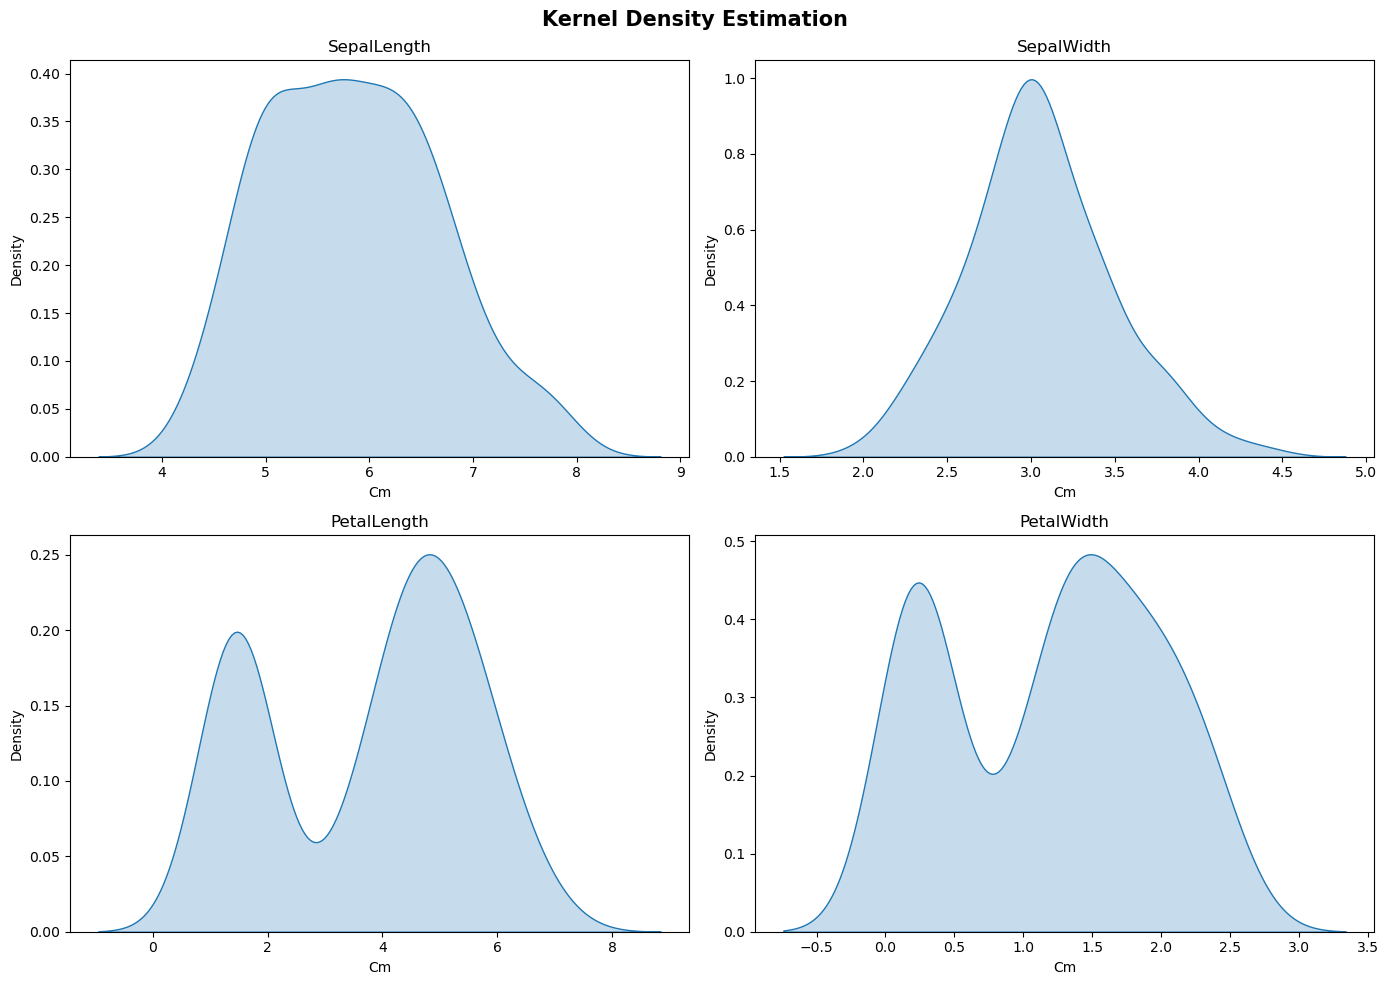

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Kernel Density Estimation", fontweight="bold", fontsize=15)
# Flatten the axes array
axes = axes.flatten()

for i, feature in enumerate(num_cols):  # Exclude the last column 'Species'
    sns.kdeplot(data=df, x=feature, fill=True, ax=axes[i])
    axes[i].set_xlabel("Cm")
    axes[i].set_ylabel('Density')
    axes[i].set_title(feature, fontsize=12)

plt.tight_layout()
plt.show()

The above plots show how the variables are distributed on their scale. We know that they share the same unit (Cm), we can plot them on the same axis range to compare their scale easier.

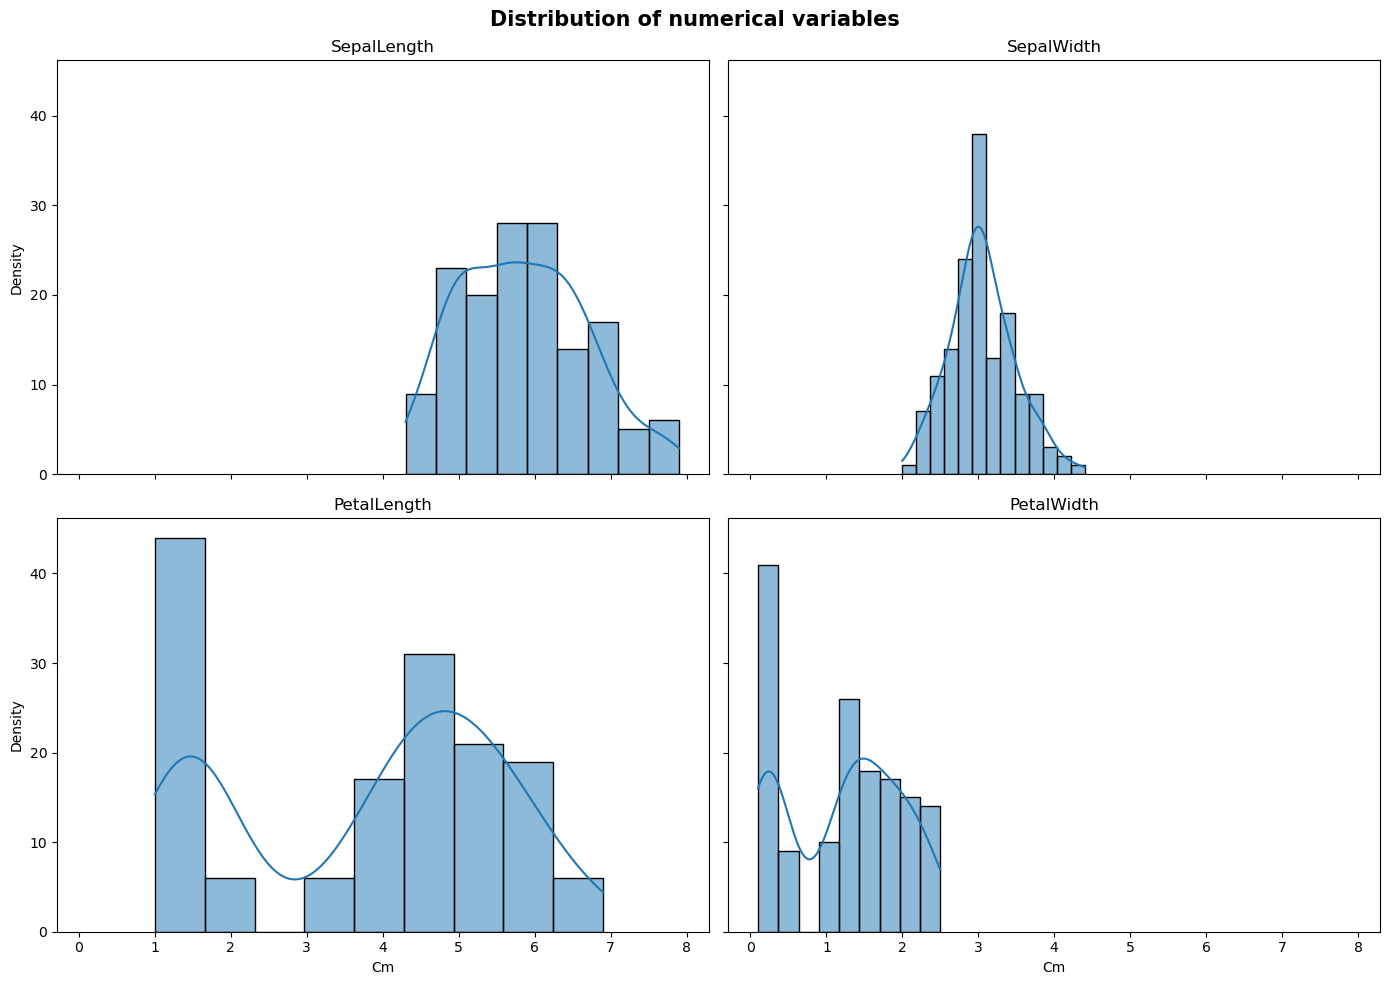

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.suptitle("Distribution of numerical variables", fontweight="bold", fontsize=15)
# Flatten the axes array
axes = axes.flatten()

for i, feature in enumerate(num_cols):  # Exclude the last column 'Species'
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_xlabel("Cm")
    axes[i].set_ylabel('Density')
    axes[i].set_title(feature, fontsize=12)

plt.tight_layout()
plt.show()

**Observations**:

1. `Sepal Length`:
    - The sepal length data appears to be somewhat uniform since their values are distributed almost evenly along many value ranges, with most of the lengths centered around 5-7 cm.
    - There doesn't seem to be a clear separation or grouping in the sepal length data, which suggests that sepal length alone might not be a good feature to differentiate between the species.
2. `Sepal Width`:
    - The sepal width data appears to follow a normal distribution, with most values centered around 3 cm symmetrically.
    - Like sepal length, the width also doesn't show clear separations or groups, suggesting that it might not be as useful for differentiating between the species as petal length or petal width.
3. `Petal Length`:
    - The histogram shows two distinct groups in the petal length data, which suggests that this feature might be a good indicator to differentiate between certain Iris species.
    - One group is centered around a petal length of 1-2 cm, and the other is more spread out, ranging from 3 to 7 cm. This could potentially indicate a difference between a certain Iris species with shorter petals and the other species with longer petals.
4. `Petal Width`:
    - Similar to petal length, petal width also shows two distinct groups. One group has a petal width of less than 1 cm and the other ranges from 1 to 2.5 cm.
    - This feature could also be useful in differentiating between Iris species.

## 2.3. Bivariate Analysis

### Comparison of Sepal and Petal Characteristics Across Iris Species

Let's try to compare the characteristics of sepals and petals between Iris species

In [20]:
species_palette = sns.color_palette()
species_colors = {'Iris-setosa': species_palette[0], 'Iris-versicolor': species_palette[1], 'Iris-virginica': species_palette[2]}

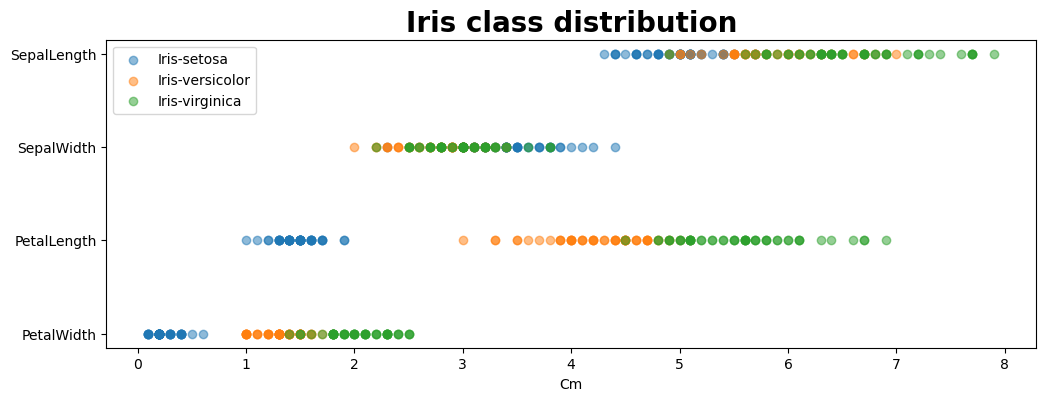

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))

# reverse the column order to fit with different plots
num_cols_re = num_cols.tolist()
num_cols_re.reverse()

for i, feature in enumerate(num_cols_re):
    for species in df['Species'].unique():
        x = df[df['Species'] == species][feature]
        if i == 0:
            ax.scatter(x, np.full_like(x, i), c=species_colors[species], marker='o', alpha=0.5, label=species)
        else:
            ax.scatter(x, np.full_like(x, i), c=species_colors[species], marker='o', alpha=0.5)

ax.set_xlabel("Cm")
ax.set_yticks(range(len(num_cols_re)))
ax.set_yticklabels(num_cols_re)
ax.set_title('Iris class distribution', fontweight="bold", size=20)
ax.legend()
plt.show()


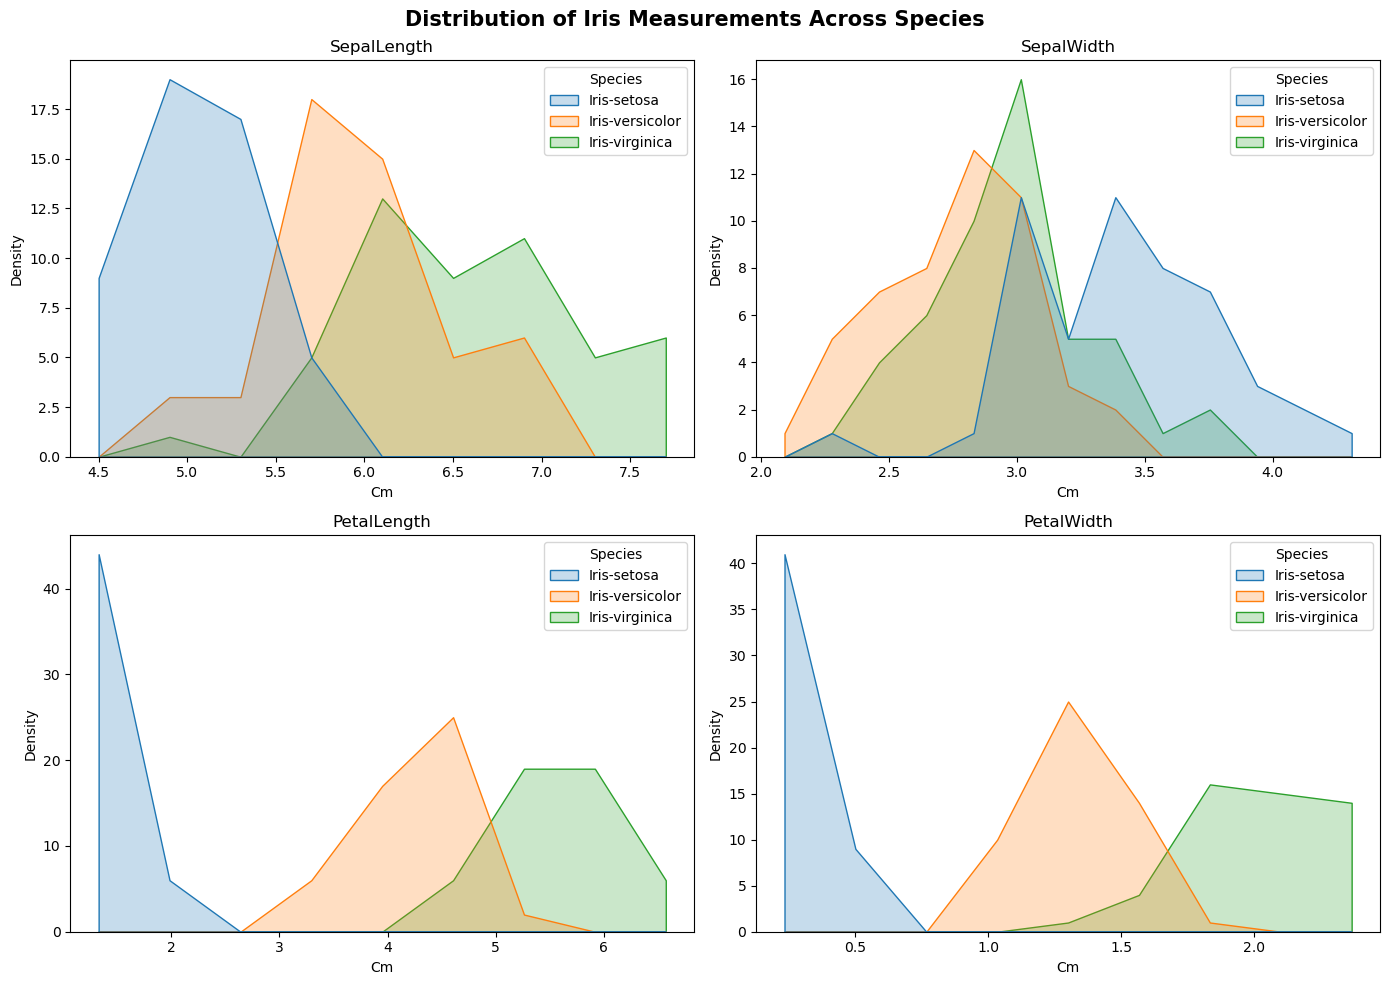

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Iris Measurements Across Species", fontweight="bold", fontsize=15)
# Flatten the axes array
axes = axes.flatten()

for i, feature in enumerate(num_cols):  # Exclude the last column 'Species'
    sns.histplot(data=df, x=feature, ax=axes[i], hue='Species', element="poly", palette=species_palette)
    axes[i].set_xlabel("Cm")
    axes[i].set_ylabel('Density')
    axes[i].set_title(feature.replace("Cm", ""), fontsize=12)

plt.tight_layout()
plt.show()

**Comment**:
1. `Sepal Length`: 
    - Iris-setosa has the smallest sepal length. We can see an outlier (blue dot) in the graph.
    - Iris-versicolor has a sepal length of about 5 cm to 7 cm. 
    - Iris-virginica has the largest sepal length (above 7 cm).
2. `Sepal Width`: 
    - Iris-versicolor has the smallest sepal width. 
    - The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. 
    - However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.
3. `Petal Length`: 
    - Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. 
    - For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. 
    - Iris-virginica has the largest petal length (5 cm or greater).
4. `Petal Width`: 
    - Iris-setosa has the smallest petal width. 
    - Iris-versicolor has a petal width from 1 cm to slightly less than 2 cm. 
    - Iris-virginica has a petal width that is approximately greater than 1.8 cm.

### Boxplot Comparison of Sepal and Petal Characteristics Across Iris Species

Boxplots are a standardized way of displaying the distribution of data.

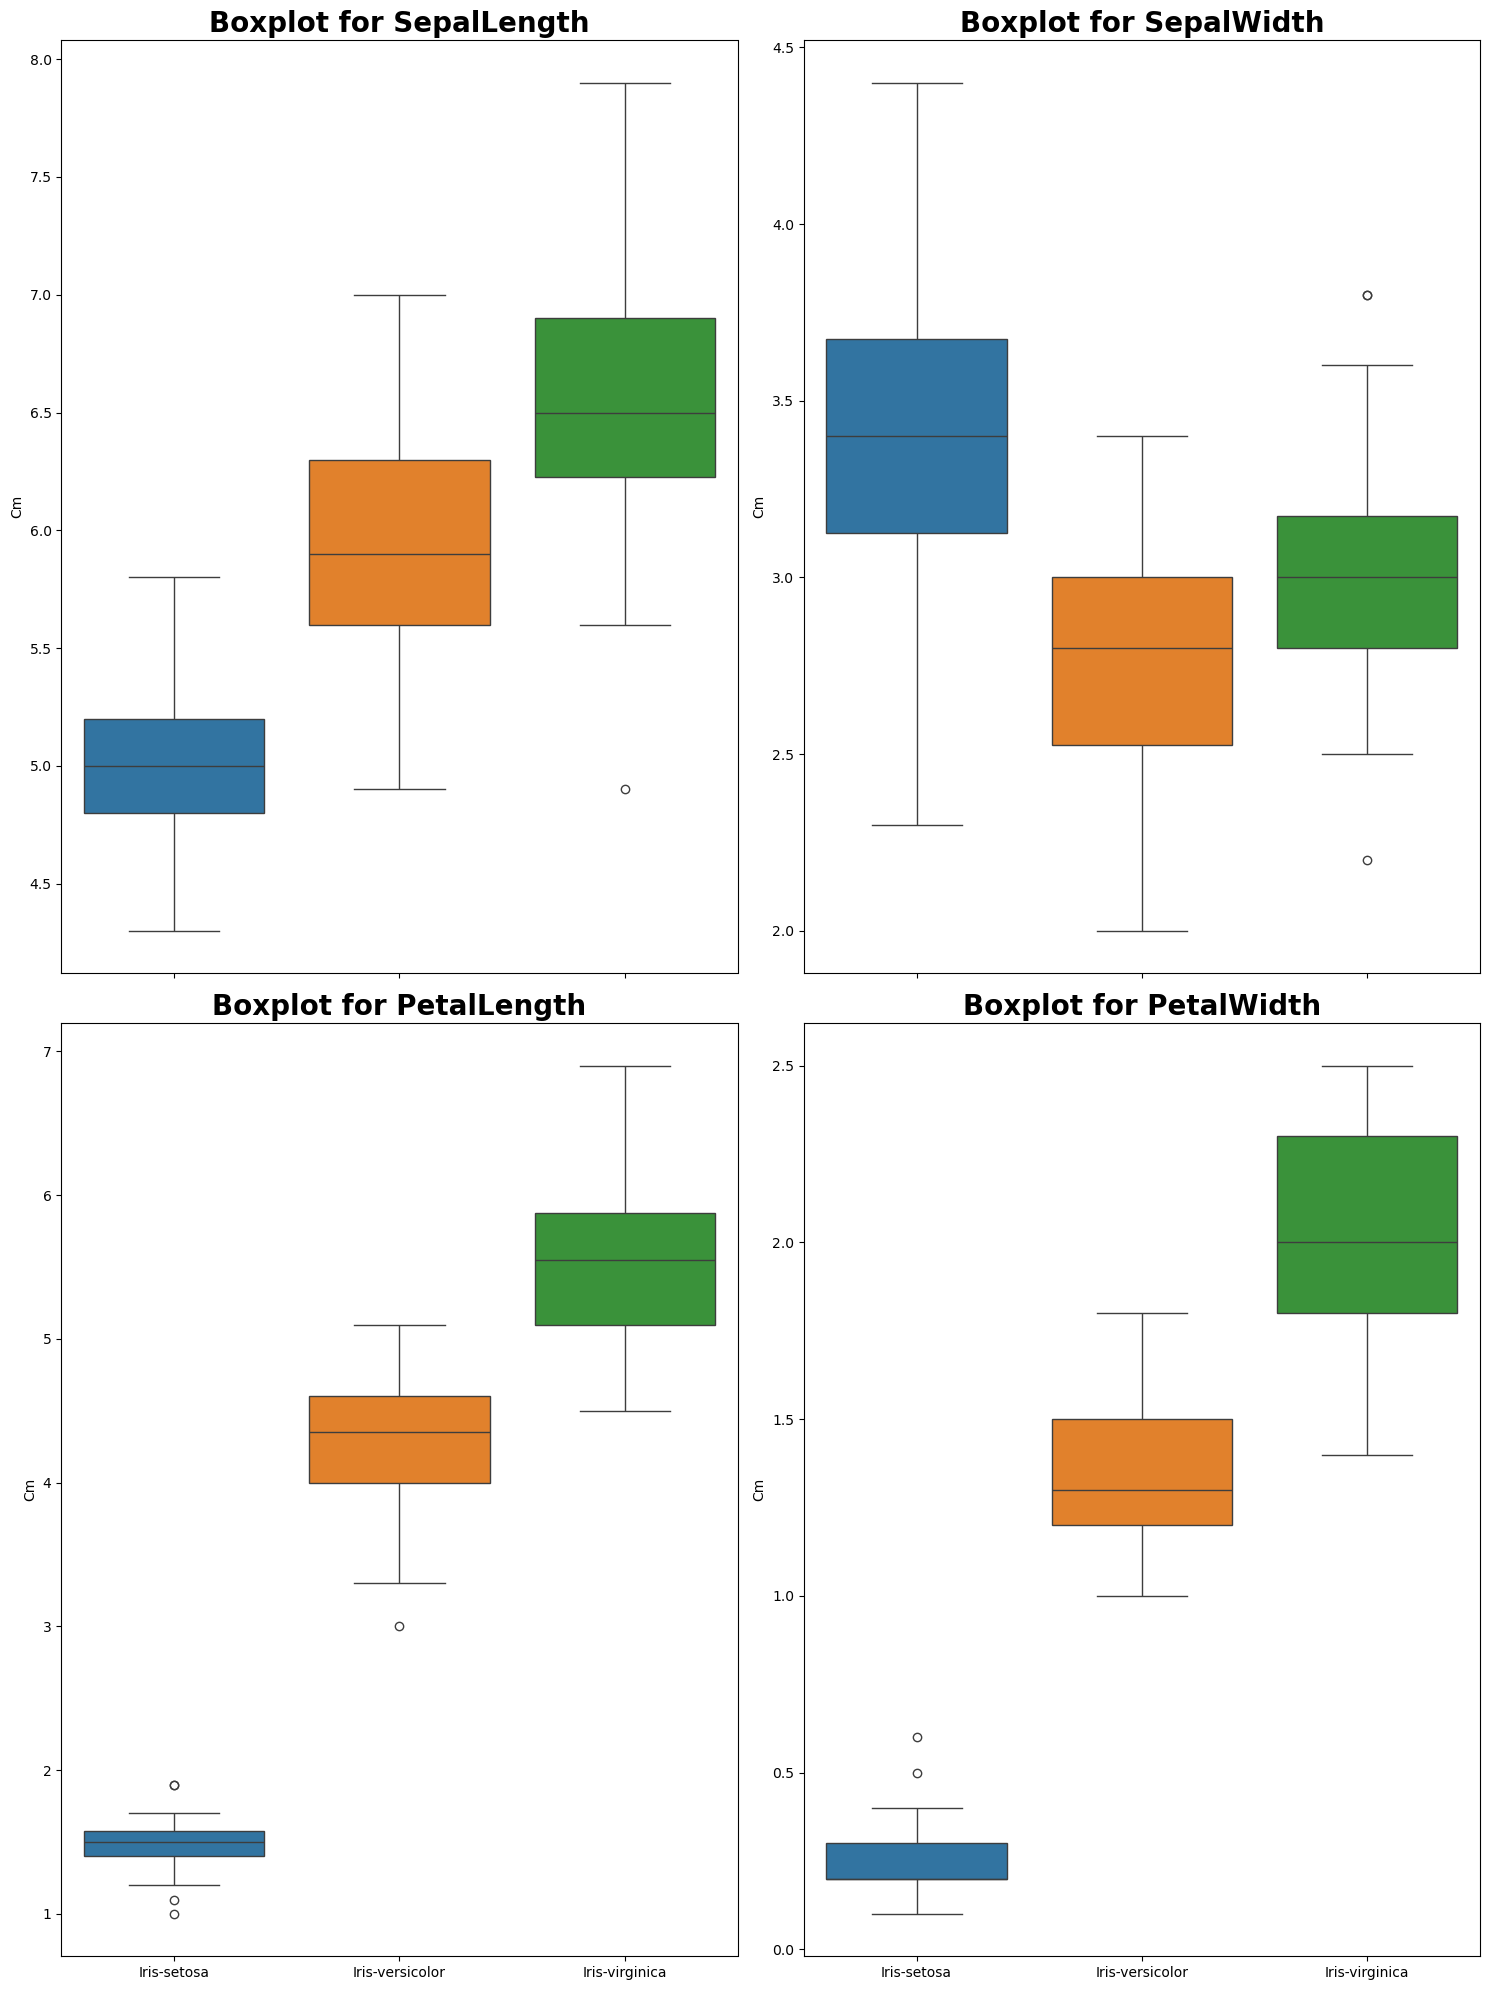

In [23]:
fig, axes = plt.subplots(2, 2,figsize=(15, 20), sharex=True)

for ax, feature in zip(axes.flatten(), num_cols):
    sns.boxplot(ax=ax, data = df, x = 'Species', y = feature, hue='Species', palette=species_palette)
    ax.set_title('Boxplot for ' + feature, fontweight="bold", fontsize = 20)
    ax.set_xlabel("")
    ax.set_ylabel("Cm")
    
fig.tight_layout()
plt.show()

**Comment**:
1. `SepalLength`:
    - The smallest value range of sepal lengths is Iris-setosa and the largest is Iris-virginica.
2. `SepalWidth`: 
    - The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa.
    - Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
3. `PetalLength`: 
    - Visually it is very evident that Iris-setosa has the least petal length.
    - Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
4. `PetalWidth`: 
    - Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

### Violinplot Comparison of Sepal and Petal Characteristics Across Iris Species

After analyzing the boxplot, we will use a Violin plot to get a deeper look at the distribution of the data and the relationship between numeric and categorical variables. This way we can see the difference in data distribution between groups.

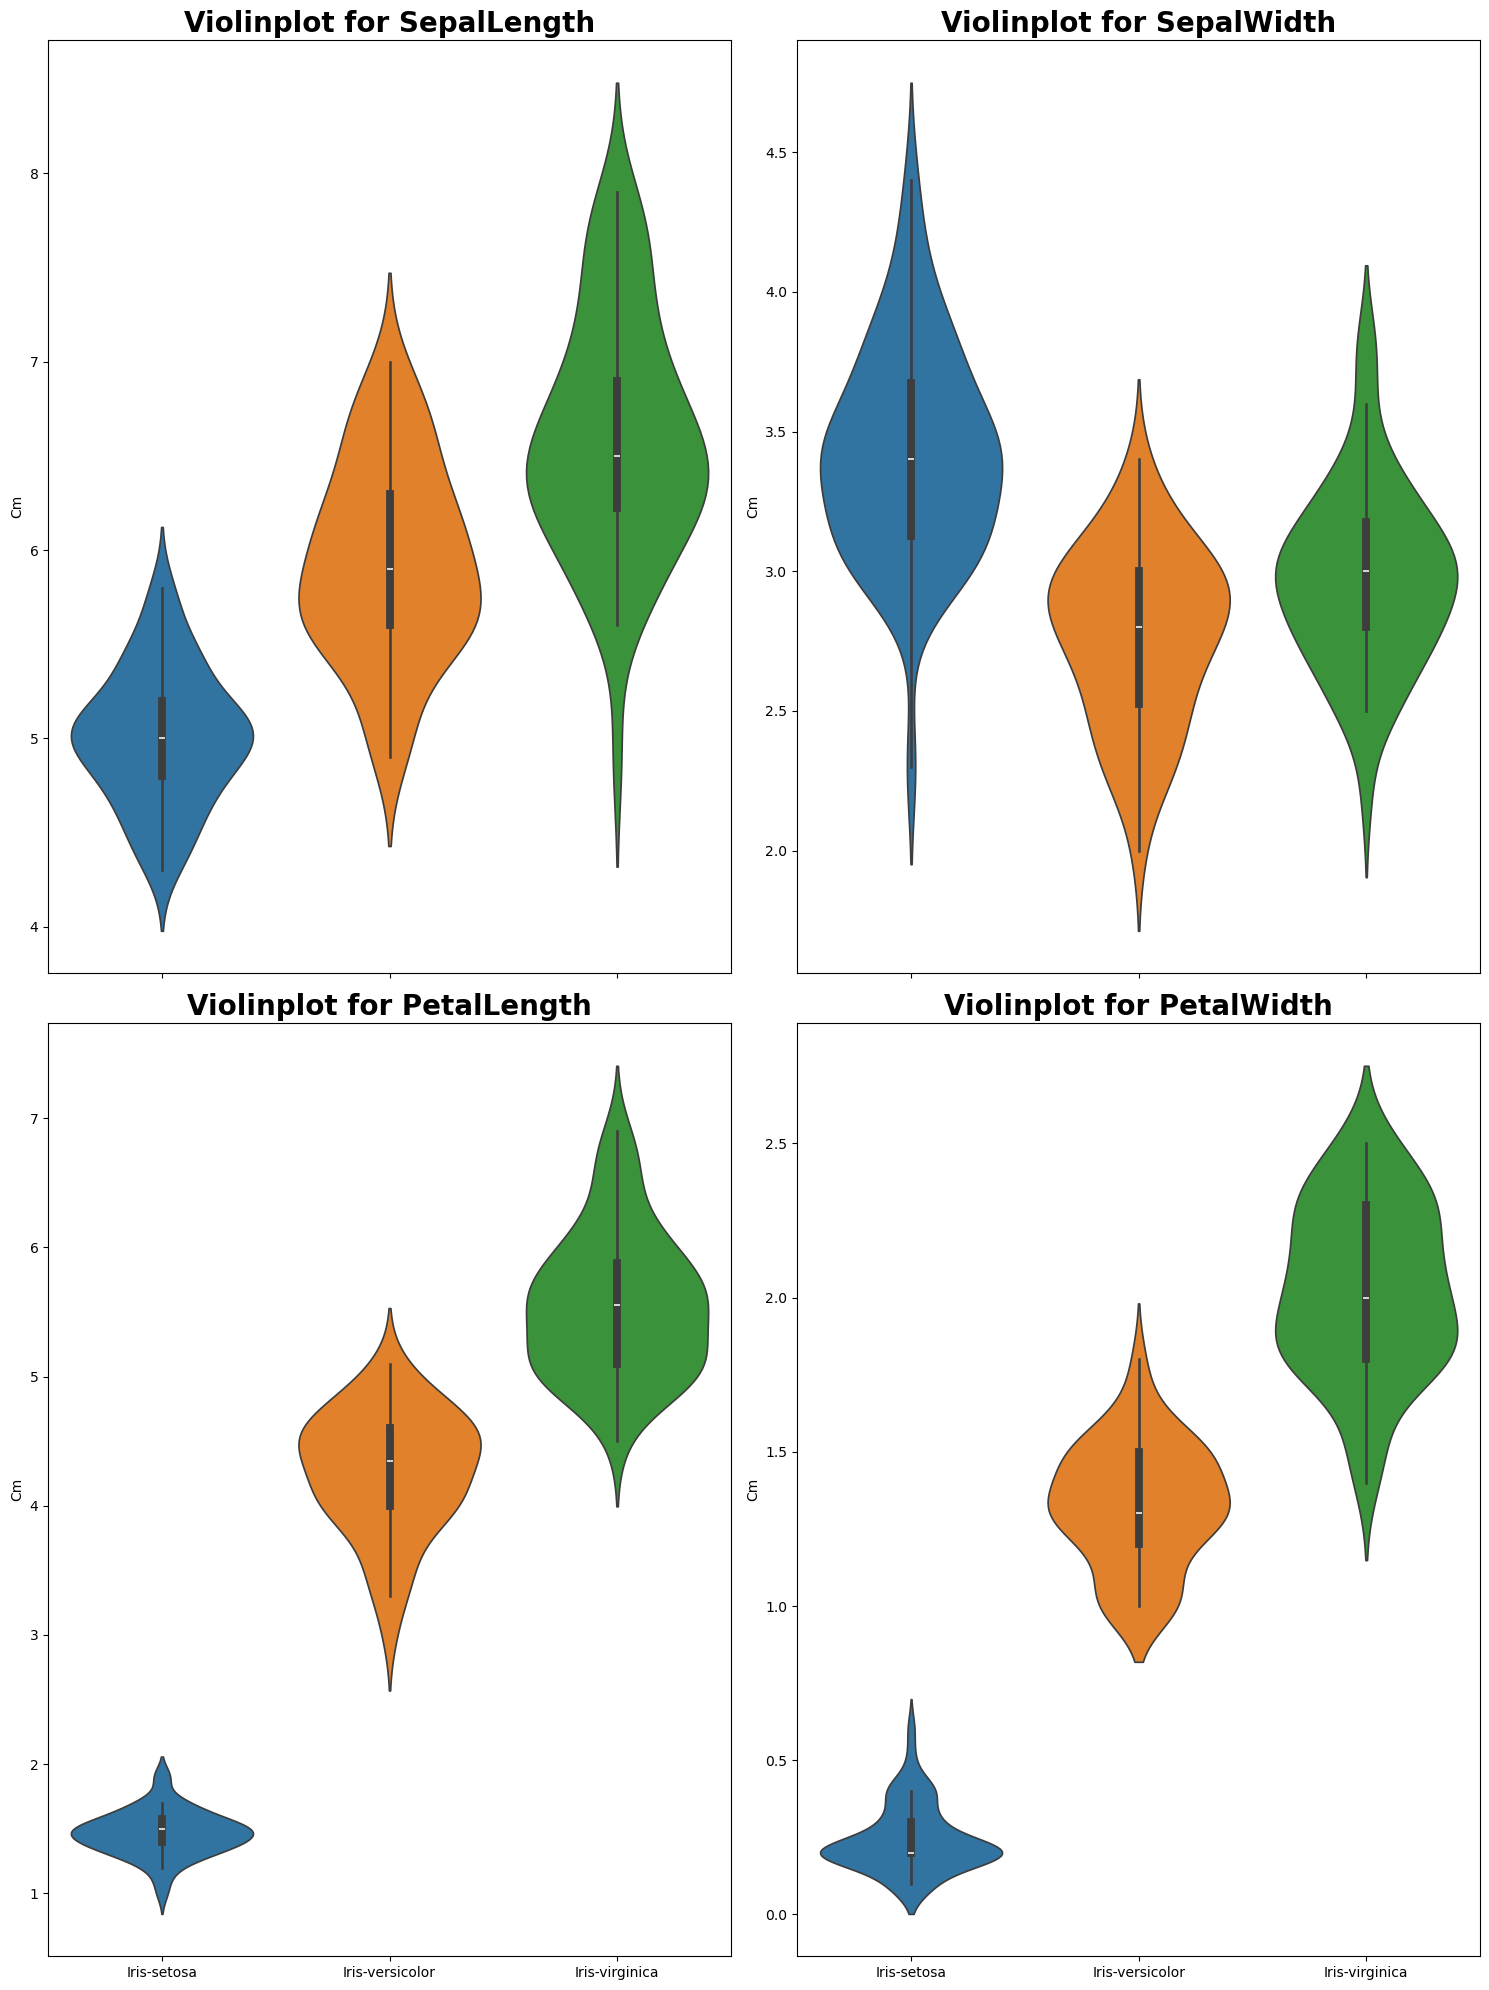

In [24]:
fig, axes = plt.subplots(2, 2,figsize=(15, 20), sharex=True)

for ax, feature in zip(axes.flatten(), num_cols):
    sns.violinplot(ax=ax, data = df, x = 'Species', y = feature, hue='Species', palette=species_palette)
    ax.set_title('Violinplot for ' + feature, fontweight="bold", fontsize = 20)
    ax.set_xlabel("")
    ax.set_ylabel("Cm")
    
fig.tight_layout()
plt.show()

**Comment**:

From the violin-plot, some observations are almost similar to the box-plot but now we can see their distribution clearer.
1. `SepalLength`: 
    - There is a high probability that Iris-setosa will have a sepal length of 5 cm.
    - It's clear that the Setosa species tends to have shorter sepals compared to the other two species.
    - Versicolor and Virginica have more overlap in sepal length, but Virginica tends to have slightly longer sepals.
2. `SepalWidth`: 
    - The Setosa species tends to have wider sepals compared to the other two species.
    - For Iris-versicolor and Iris-virginica there is a high probability that they will have approximately the same sepal width, but Versicolor tends to have slightly narrower sepals. Thus identification of the species based on this feature only might not yield good results.
3. `PetalLength`: 
    - Most of petal lengths for Iris-setosa are about 1.5 cm.
    - The petal length clearly differentiates the Setosa species from the other two. Setosa has significantly shorter petals.
    - Versicolor and Virginica also show some differentiation, with Virginica having longer petals.
4. `PetalWidth`: 
    - Similar to petal length, petal width also clearly differentiates the Setosa species, which has narrower petals.
    - Versicolor has intermediate petal width, and Virginica has the widest petals.
    - There is a high probability that the petal width for Iris-setosa species would be approximately 0.25 cm. 
    - The violin plots for Iris-versicolor and Iris-virginica are not as broad as that of Iris-setosa.

## 2.4. Correlations Analysis

- `Correlation Analysis`: Correlation analysis is typically performed on numerical variables to understand the strength and direction of linear relationships between pairs of variables.
- Including categorical variables in correlation analysis isn't meaningful because correlation measures linear relationships between continuous variables, and categorical variables do not have a continuous scale.
- Therefore, it's essential to preprocess the data by converting categorical variables into a numerical format (dummy variables) and standardizing numerical variables to ensure that the correlation analysis accurately reflects the relationships between features.

First, One-Hot Encoding for Categorical Variables. The categorical column `Species` is transformed into dummy variables using one-hot encoding (`pd.get_dummies()`)

In [25]:
dummy_variables = pd.get_dummies(df, columns=[categorical_columns], drop_first=False)
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(num_cols, axis=1)

Next, we'll address the standardization of the numerical variables to mitigate any potential bias due to differences in magnitude. However, given that all the numerical variables (`SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`) are measured in the same unit (cm), standardization is unnecessary. Additionally, the standard correlation method, Pearson correlation (_pearson_), is unaffected by differences in magnitude. Therefore, we can proceed without standardization.

In [26]:
# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, df[num_cols]], axis=1)

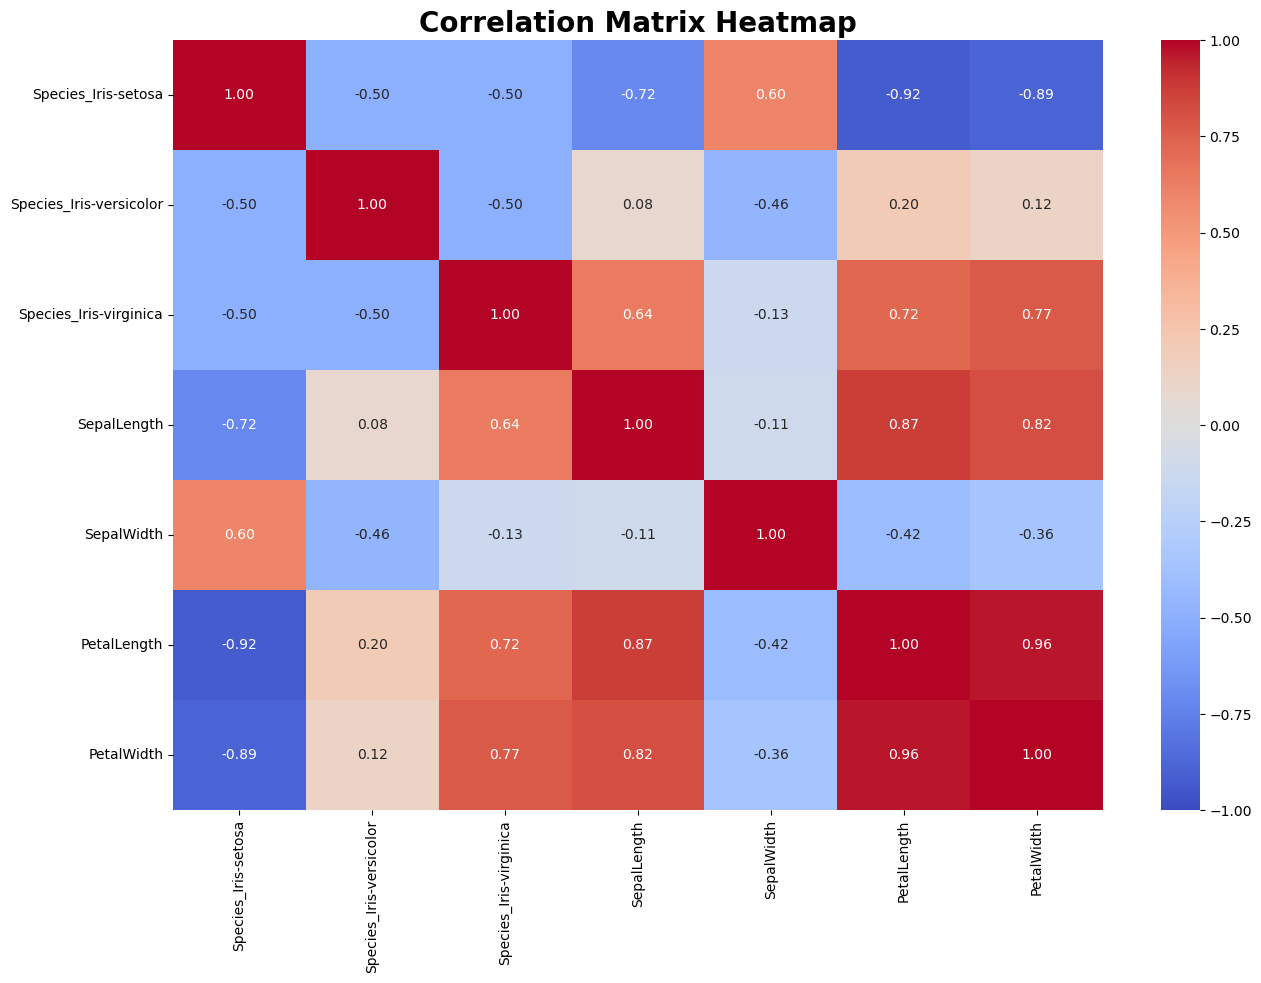

In [27]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap", fontweight='bold', fontsize=20)
plt.show()

**Observations:**

- `Species_Iris-setosa` is strongly negatively correlated with `PetalLengthCm` and `PetalWidthCm` (`-0.92` and `-0.89` respectively). This means that as the petal length and width increase, it's less likely to be a setosa. 

- `Species_Iris-versicolor` has weak positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.20` and `0.12` respectively), meaning these dimensions do not contribute significantly to being a versicolor. 

- `Species_Iris-virginica` has fairly strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.72` and `0.77` respectively). This suggests that as petal length and width increase, it's more likely to be a virginica. 

- `SepalLengthCm` has strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.87` and `0.81` respectively). This implies that as sepal length increases, petal length and width also tend to increase. 

- `SepalWidthCm` is negatively correlated with `PetalLengthCm` and `PetalWidthCm` (`-0.42` and `-0.35` respectively), suggesting that as the sepal width increases, the petal length and width tend to decrease, but this correlation is not very strong. 

- `PetalLengthCm` and `PetalWidthCm` are very strongly correlated (`0.96`), implying that petal length and width tend to increase together.

## 2.5. Multivariate Analysis

### Scatterplot of Petal Length vs Petal Width by Iris Species

To better understand the relationship between variables, we will use a scatter plot.

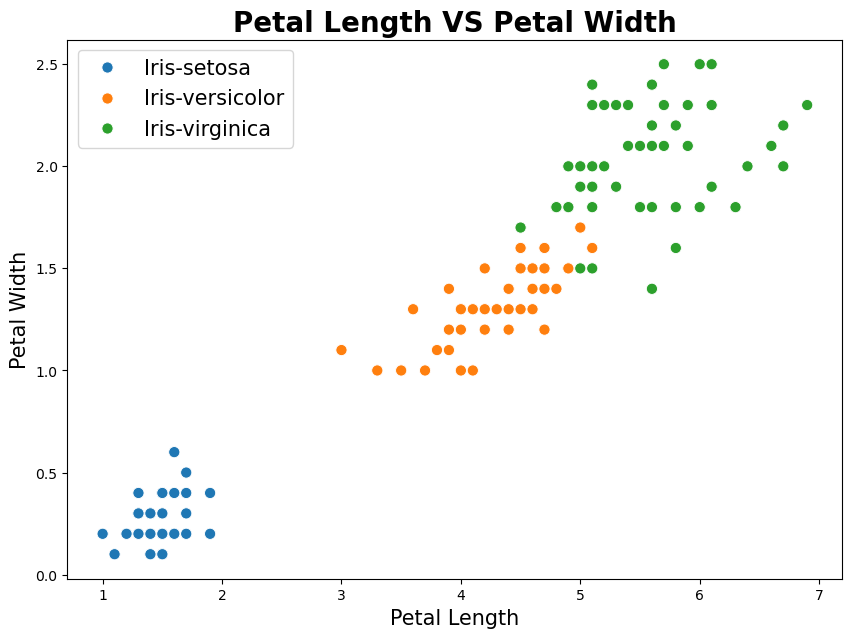

In [28]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'PetalLength', y = 'PetalWidth', hue = 'Species', data = df, s = 65, palette=species_palette)
plt.legend(fontsize = 15)
plt.title('Petal Length VS Petal Width', fontweight="bold", fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)
plt.show()

**Comment**:
- We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

### Scatterplot of Sepal Length vs Sepal Width by Iris Species


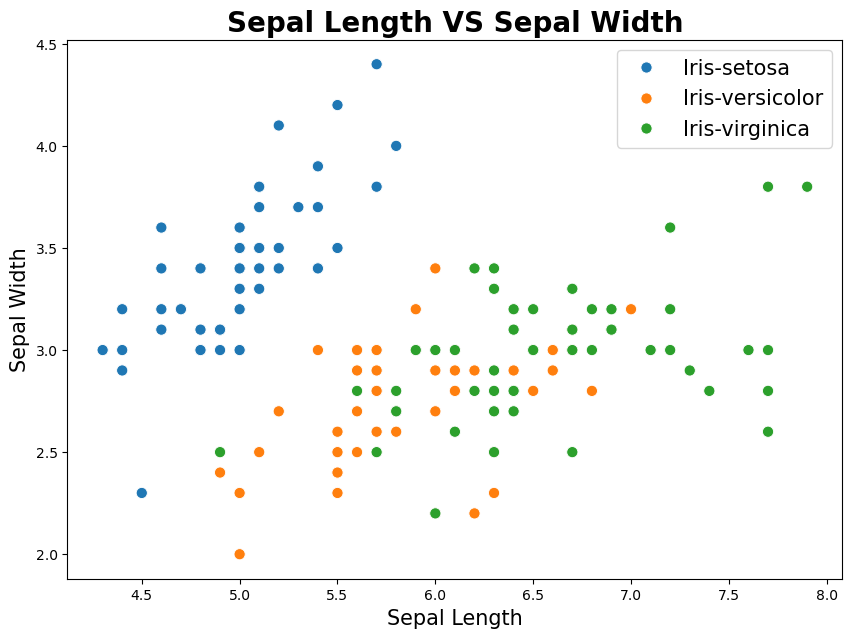

In [29]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'SepalLength', y = 'SepalWidth', hue = 'Species', data = df, s = 65, palette=species_palette)
plt.legend(fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontweight="bold", fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

**Comment**:
- We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width. 

### Pairplot of Iris Features by Species

Along with pair plot analysis, we can use pair plot to explore the relationship between all pairs of variables in the data set. Pair plot provides a comprehensive view of the correlation between variables and helps us identify special data distribution patterns or non-linear relationships.

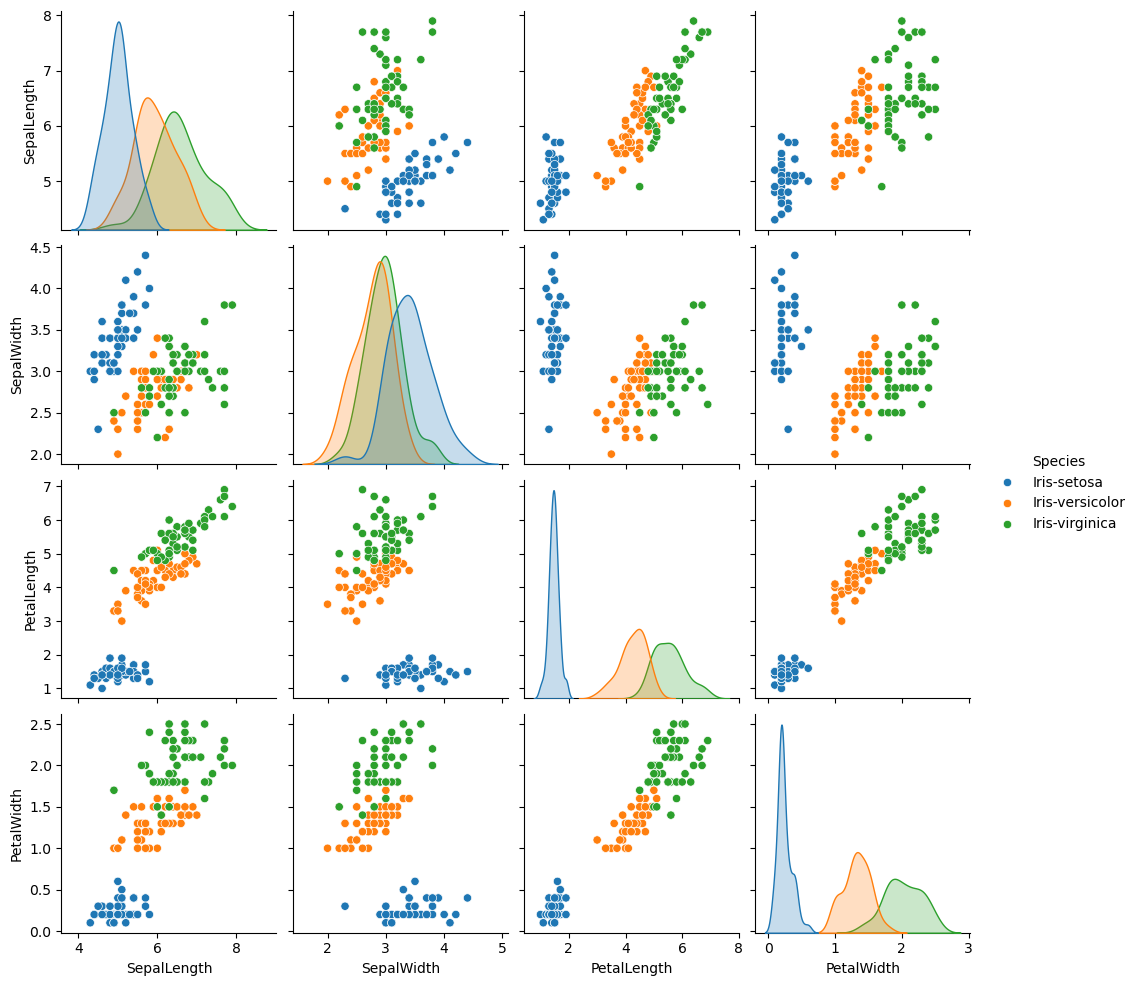

In [30]:
sns.pairplot(df, hue = 'Species', palette=species_palette)
plt.show()

**Comment**:

- Now we can see clearer that in all pairs of variables, we can tell the class `Iris-setosa` is clearly on a different cluster from the others, hence, it's way easier to distinguish this class compared to other class. However, note that for the variable `SepalWidth`, there is one outlier in this class having a different value that is very far from the normal range.

- For the remaining classes: `Iris-versicolor` and `Iris-virginica`, for most variables, their clusters are very close to each other, which makes it harder to distinguish them, even overlapping each other for some pairs (like `SepalWidth` and `SepalLength`), we would need another method to distinguish those 2 classes.

### Pairplot with Regression Lines of Iris Features by Species

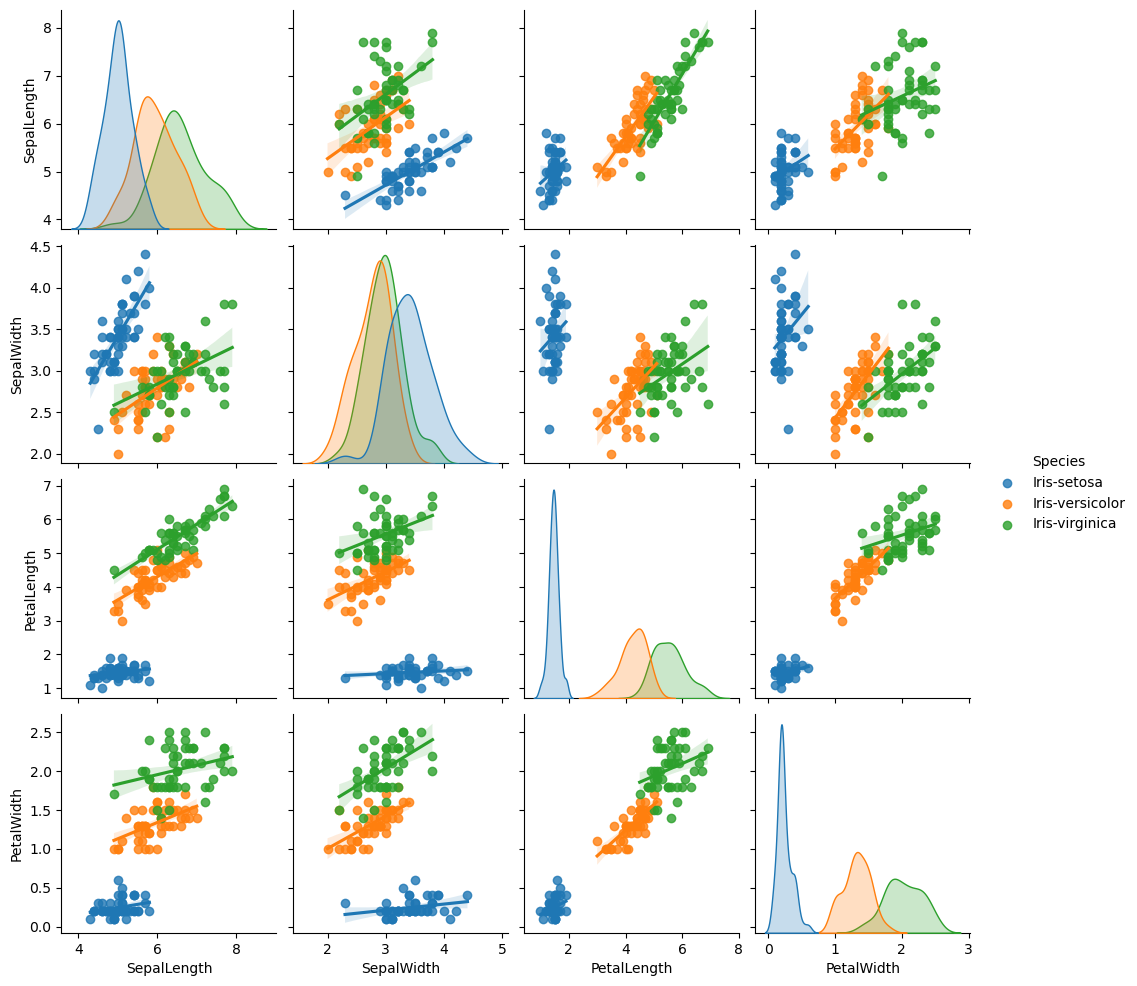

In [31]:
sns.pairplot(data=df, kind='reg', hue='Species', palette=species_palette)
plt.show()

**Comment**:

- In this plot, we can see the relationship between pairs of variables easier thanks to the additional regression lines that we used.

- For pairs with shallow-sloped lines, such as `SepalWidth` and `PetalWidth`, a less distinct relationship is apparent. For instance, within the `Iris-setosa` class, the relationship is less evident, while for the other two classes, a stronger correlation is observed.

- Furthermore, employing regression lines facilitates the rapid assessment of overlapping clusters in any variable pair. This can be determined by examining the distance between regression lines or observing if they intersect.

- For instance, in the `SepalWidth` and `PetalWidth` pair, the considerable separation between the regression lines of the `Iris-versicolor` and `Iris-virginica` classes suggests minimal overlap, enabling straightforward differentiation. Conversely, in the `SepalWidth` and `SepalLength` pair, the proximity and even intersection of the regression lines for both classes indicate significant overlap, rendering differentiation more challenging.

### Analyze Iris Features by Species

Combining the above visualization methods, we can analyze the relationships between variables more easily. We can also utilize the lower (or upper) triangle to plot a different type of chart since they carry the same meaning. Here, we use contour plots to see their distribution and overlapping clusters more clearly.

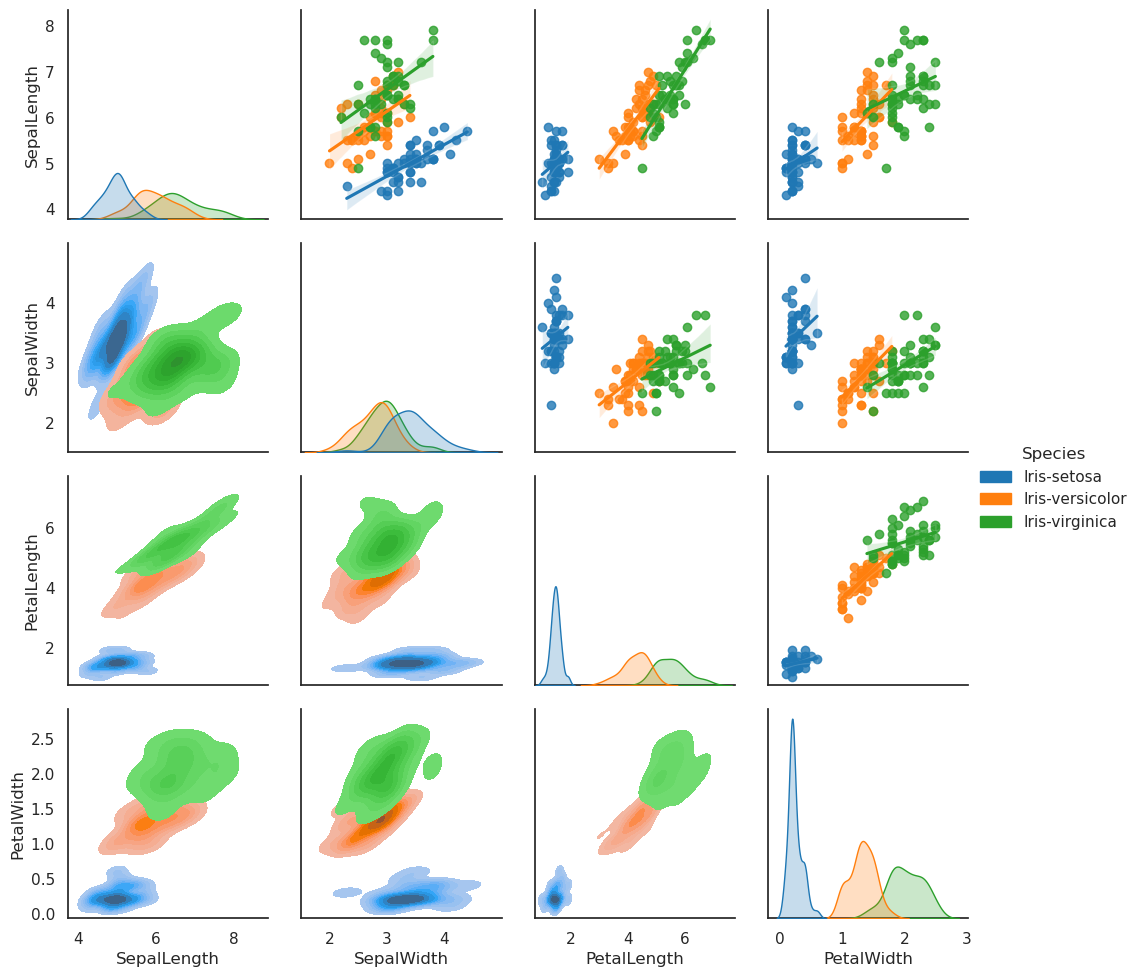

In [32]:
sns.set(style="white")
g = sns.PairGrid(df, hue="Species", palette=species_palette)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend()
plt.show()

**Comment:**

1.  `Sepal Length` vs. `Sepal Width`: There's some overlap between the species, but it's clear that Setosa generally has shorter and wider sepals compared to the other two species.

2. `Petal Length` vs. `Petal Width`: This pair of features clearly differentiates the species. Setosa has shorter and narrower petals, Versicolor has medium-length and medium-width petals, and Virginica has the longest and widest petals.

3. `Sepal Length` vs. `Petal Length` and `Sepal Length` vs. `Petal Width`: These plots show that Setosa has shorter sepals and petals, while Virginica has the longest sepals and petals. Versicolor falls in between.

4. `Sepal Width` vs. `Petal Length` and `Sepal Width` vs. `Petal Width`: These plots show that Setosa has wider sepals and shorter petals. On the other hand, Virginica has narrower sepals and longer petals. Versicolor falls in between.

## 2.6. 3D Visualization

### 3D Scatter Plot with Color by Species

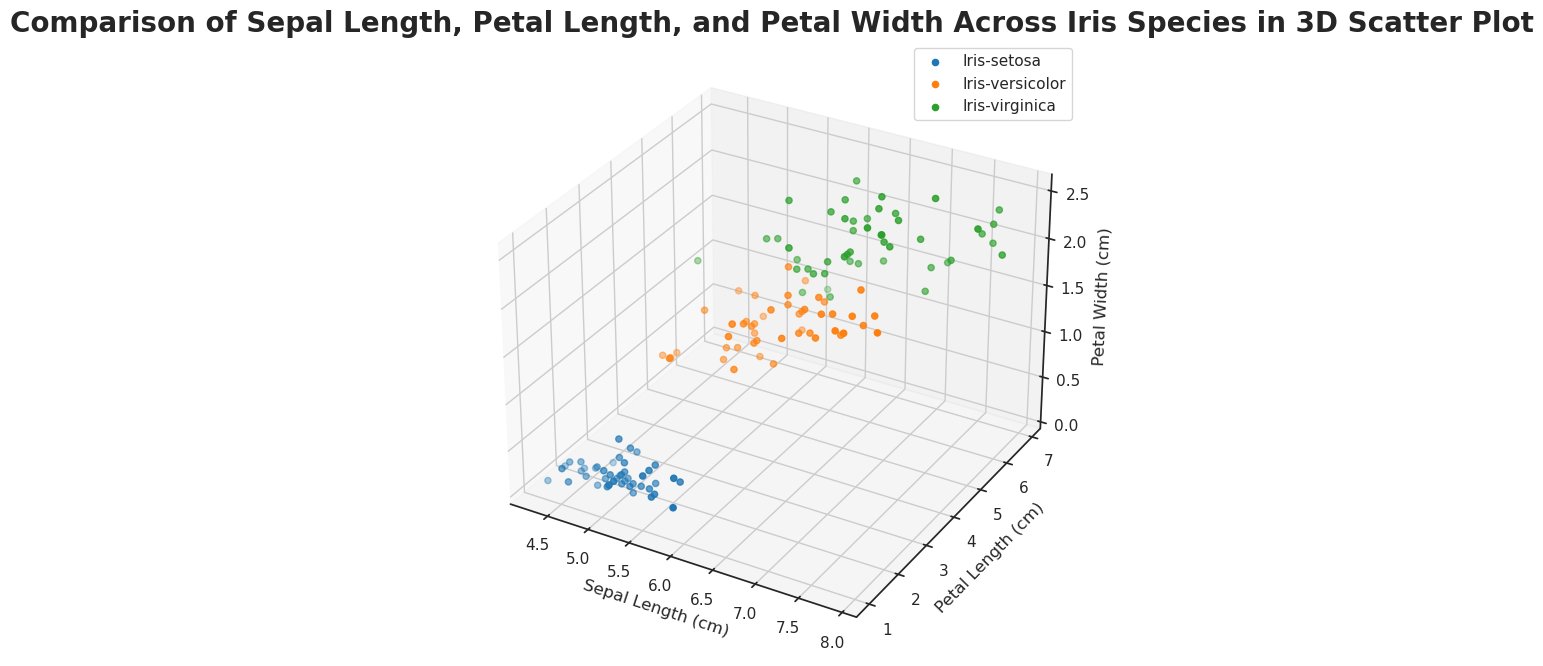

In [33]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

for species, color in species_colors.items():
    ax.scatter(df[df['Species'] == species]['SepalLength'], 
               df[df['Species'] == species]['PetalLength'], 
               df[df['Species'] == species]['PetalWidth'], 
               c=color, label=species)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('Comparison of Sepal Length, Petal Length, and Petal Width Across Iris Species in 3D Scatter Plot', fontweight="bold", fontsize=20)
ax.legend()


plt.show()

**Comment:**

- The `Iris-setosa` species is clearly separated from the other two species. This suggests that setosa has distinct feature measurements compared to versicolor and virginica, which aligns with our previous observations from the univariate, bivariate, and multivariate analyses.
  
- The `Iris-versicolor` and `Iris-virginica` species show some overlap but also some degree of separation. This suggests that while these two species have similar feature measurements, there are still differences that can be used to distinguish between them.

### 3D Scatter Plot using Plotly for more interactive

Recall that for this pair of variables `SepalWidth` and `SepalLength`, it's very hard to distinguish the classes `Iris-versicolor` and `Iris-virginica` since their clusters overlap each other in the 2D scatter. Let's see if it's possible to separate them using an additional dimension (`PetalWidth`).

In [34]:
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

colors_rgb = {}
for species, color_tuple in species_colors.items():
    rgb_color = 'rgb' + str(tuple(int(255 * x) for x in color_tuple))
    colors_rgb[species] = rgb_color

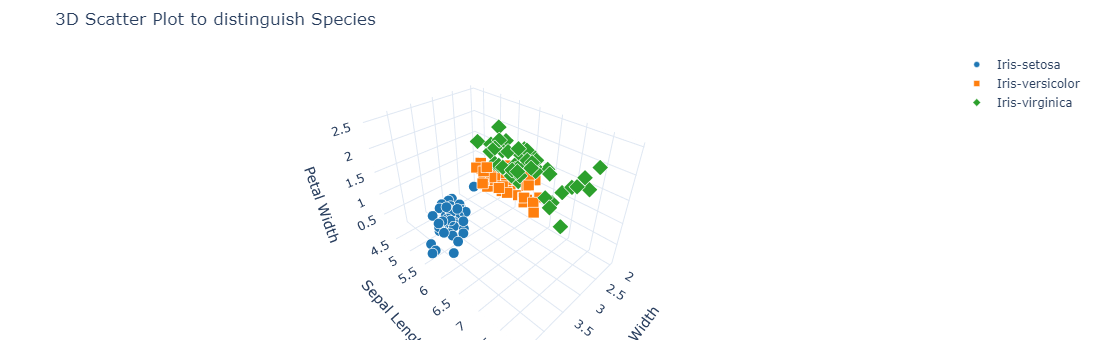

In [35]:
trace1 = go.Scatter3d(
                      x = setosa.SepalWidth,
                      y = setosa.SepalLength,
                      z = setosa.PetalWidth,
                      mode = "markers",
                      name = "Iris-setosa",
                      marker = dict(
                           size = 6,
                           color = colors_rgb['Iris-setosa'],
                           symbol = "circle",line = dict(color = "rgb(255,255,255)", width = 0.5)
                      )
)
trace2 = go.Scatter3d(
                      x = versicolor.SepalWidth,
                      y = versicolor.SepalLength,
                      z = versicolor.PetalWidth,
                      mode = "markers",
                      name = "Iris-versicolor",
                      marker = dict(
                           size = 6,
                           color = colors_rgb["Iris-versicolor"],
                           symbol = "square",line = dict(color = "rgb(255,255,255)", width = 0.5)
                      )
)
trace3 = go.Scatter3d(
                      x = virginica.SepalWidth,
                      y = virginica.SepalLength,
                      z = virginica.PetalWidth,
                      mode = "markers",
                      name = "Iris-virginica",
                      marker = dict(
                           size = 6,
                           color = colors_rgb["Iris-virginica"], 
                           symbol = "diamond",line = dict(color = "rgb(255,255,255)", width = 0.5)
                      )
)

combine = [trace1,trace2,trace3]
layout = go.Layout(
    scene = dict(
    xaxis =dict(
        title = "Sepal Width"),
    yaxis =dict(
        title ="Sepal Length"),
    zaxis =dict(
        title = "Petal Width"),),
    width = 760,
    margin = dict(l = 50,r = 50,b = 20,t = 50 ),
    title="3D Scatter Plot to distinguish Species",
    template="plotly_white"
)
    
fig = go.Figure(data = combine, layout = layout)


iplot(fig)

**Comment:**

- Great, after incorporating an additional dimension (using the variable `PetalWidth`), the classes `Iris-versicolor` and `Iris-virginica` have been more clearly separated because they have different `PetalWidth` values (meaning different heights).

- For the remaining class `Iris-setosa`, it seems that no adverse effects occurred as we can still easily distinguish this class, perhaps because the range of values for `PetalWidth` in this class does not vary much.

- At this point, using only these three variables, we have been able to cluster these classes quite well. However, it seems very challenging to distinctly differentiate between the clusters of `Iris-versicolor` and `Iris-virginica` as their features (parameters) are very similar due to the similar shapes of these two types of flowers. To achieve better clustering quality, we should consider using additional features such as color, patterns, etc (that are unrelated to size, and shape).

# 3. Insights

After analyzing this Iris Species Dataset, here are some insights that could be useful or interesting:

1. Most sepals have a length of about 5.84 cm (half ranging from 5.1 to 6.4 cm), and the width falls around 3.05 cm (half ranging from 2.8 cm to 3.3 cm). Similarly, the average petal length is approximately 3.76 cm (half ranging from 1.6 cm to 5.1 cm), and the average petal width is about 1.2 cm (half ranging from 0.3 cm to 1.8 cm).

2. The length and width of the petals can be important characteristics for distinguishing between Iris species, with the data distribution showing significant differences between groups. However, the length and width of the sepals do not demonstrate clear separation and do not provide useful information for distinguishing between species.

3. Iris-setosa typically has shorter and narrower sepals and petals compared to the other two species. Iris-versicolor has the widest sepals among the three species. Iris-virginica typically has the longest and widest sepals and petals among the three species.

4. The size of the sepals and petals can be used to differentiate between species. Setosa usually has wider sepals and petals, while Versicolor and Virginica have relatively similar sizes, but Versicolor tends to have slightly narrower sepals and petals compared to Virginica.

5. For sepals, Iris-setosa tends to have shorter lengths compared to Iris-versicolor and Iris-virginica. However, distinguishing between Iris-versicolor and Iris-virginica based on sepal size alone may be difficult.

6. Combining the characteristics of sepals and petals helps clearly classify the species: Setosa has short and narrow petals, Versicolor has medium-sized petals, and Virginica has the longest and widest petals.

7. The sizes of the petals (`Petal Length` and `Petal Width`) have a strong correlation with the species, especially with Iris-setosa and Iris-virginica (where there is a strong negative correlation with Iris-setosa and a fairly strong correlation with Iris-virginica).

8. Sepal Length also has a significant correlation with `Petal Length` and `Petal Width`, implying that the size of the sepals also influences the size of the petals.

9. Sepal Width has a negative correlation with Petal Length and Petal Width, but this relationship is not significant.

10. By using only these three variables (`Sepal Width`, `Sepal Length`, `Petal Length`), we have been able to cluster 3 flower types quite well. However, it seems very challenging to distinctly differentiate between the clusters of `Iris-versicolor` and `Iris-virginica` since their shape are almost identical.

# 4. References

[1] [Iris Species from Kaggle](https://www.kaggle.com/datasets/uciml/iris)

[2] https://www.kaggle.com/code/tumpanjawat/iris-species-eda-lda

[3] https://www.kaggle.com/code/yekahaaagayeham/eda-on-iris-dataset

[4] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.ptrain_df)

---
## <center>THE END</center>

## <center>THANK YOU</center>